<a href="https://colab.research.google.com/github/mshilpaa/Deep-Neural-Network/blob/master/DNN-mnist%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)
5


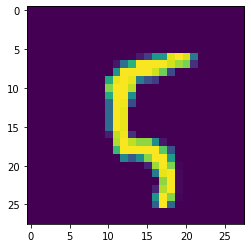

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[100])
print(y_train[100])


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(128, 3,3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(256, 1))
model.add(Convolution2D(512, 3, activation='relu'))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  


In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 5, 5, 256)         33024     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 3, 3, 512)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=5, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/5
60000/60000 [==============================] - 36s 599us/step - loss: 0.0986 - acc: 0.9698
Epoch 2/5
60000/60000 [==============================] - 35s 586us/step - loss: 0.0428 - acc: 0.9873
Epoch 3/5
60000/60000 [==============================] - 35s 591us/step - loss: 0.0342 - acc: 0.9894
Epoch 4/5
60000/60000 [==============================] - 35s 582us/step - loss: 0.0266 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 34s 575us/step - loss: 0.0213 - acc: 0.9933


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [45]:
print(score)

[0.03926073323299575, 0.9923]


In [0]:
y_pred = model.predict(X_test)

In [47]:
print(y_pred[:9])
print(y_test[:9])

[[1.66104557e-13 2.10670528e-14 2.29881170e-10 1.38132821e-08
  2.87813092e-21 1.20797420e-17 1.07566296e-22 1.00000000e+00
  1.45966416e-11 4.70967449e-13]
 [6.61655922e-16 1.25997531e-12 1.00000000e+00 2.58104494e-19
  4.99979256e-14 2.74378445e-23 4.99454319e-13 1.08688138e-16
  1.29534885e-14 7.87813762e-21]
 [2.69174548e-12 9.99999642e-01 1.56750335e-10 4.09886290e-14
  3.18312516e-07 1.01160564e-08 5.39048806e-09 5.17685235e-11
  1.89075092e-11 1.30342247e-11]
 [9.99998808e-01 3.66510081e-18 2.33599789e-11 2.42410774e-13
  2.41239875e-15 4.04910177e-12 1.17435661e-06 3.95714108e-14
  1.41500228e-10 1.36885572e-11]
 [3.28041695e-12 1.31406210e-14 4.87317841e-14 1.52690077e-16
  9.99976993e-01 9.82476166e-12 4.46444401e-12 2.29783124e-16
  3.29436374e-11 2.29727648e-05]
 [1.73660977e-12 1.00000000e+00 1.38673045e-10 4.60042486e-17
  2.07794559e-09 3.67515480e-12 1.17482994e-11 3.01751202e-12
  9.69385772e-14 3.73814423e-13]
 [4.16812835e-23 3.82344099e-14 3.61787968e-16 1.65960917e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [49]:
layer_dict

{'activation_5': <keras.layers.core.Activation at 0x7f67053d8320>,
 'conv2d_24': <keras.layers.convolutional.Conv2D at 0x7f6704e86b38>,
 'conv2d_25': <keras.layers.convolutional.Conv2D at 0x7f6704e860f0>,
 'conv2d_26': <keras.layers.convolutional.Conv2D at 0x7f67054418d0>,
 'conv2d_27': <keras.layers.convolutional.Conv2D at 0x7f6704e58588>,
 'conv2d_28': <keras.layers.convolutional.Conv2D at 0x7f6704ecc320>,
 'conv2d_29': <keras.layers.convolutional.Conv2D at 0x7f6704ec2278>,
 'flatten_5': <keras.layers.core.Flatten at 0x7f6704ec85f8>,
 'max_pooling2d_10': <keras.layers.pooling.MaxPooling2D at 0x7f6705442400>,
 'max_pooling2d_9': <keras.layers.pooling.MaxPooling2D at 0x7f6704e12fd0>}

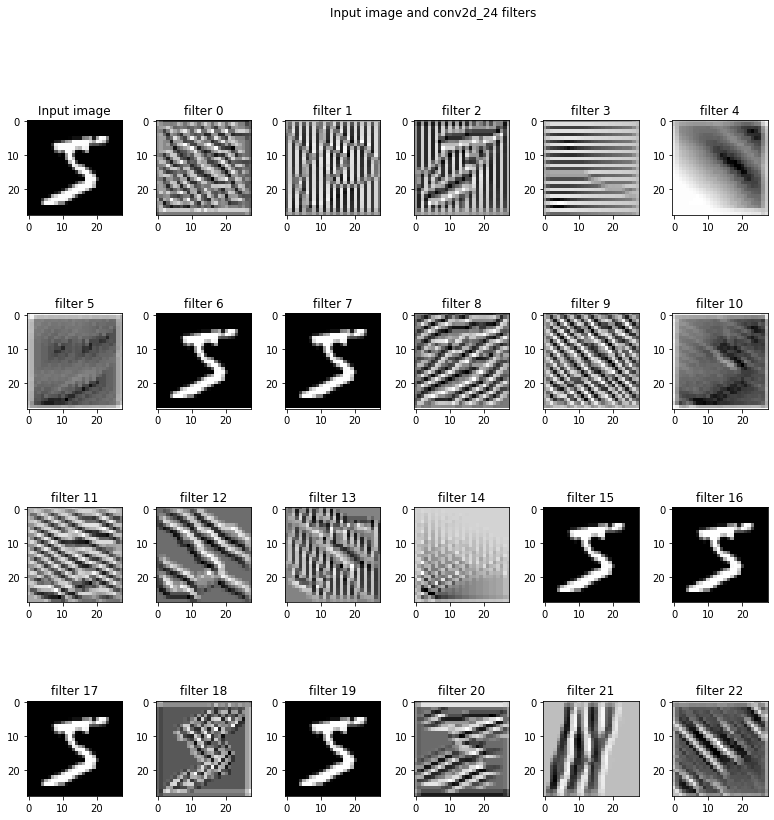

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_24'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()